<a href="https://colab.research.google.com/github/kky0216kdynm/my-first-web-site/blob/main/%E1%84%8E%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A9%E1%86%BC%E1%84%89%E1%85%A5%E1%86%AF_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC%E1%84%87%E1%85%A9%E1%86%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 파일 업로드 & 기존 파일 삭제

from google.colab import files
import os
import pandas as pd

# 기존 파일 삭제
for f in ["jajangvalue.xlsx", "jajangvalue.csv"]:
    if os.path.exists(f):
        os.remove(f)

# 새 파일 업로드
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("업로드된 파일:", file_name)

# 2. 엑셀 파일 로드 & 자동 인코딩 CSV 변환
df = pd.read_excel(file_name)

# CSV로 저장
df.to_csv("jajangvalue.csv", index=False, encoding="utf-8-sig")
df.head()


Saving jajangvalue.xlsx to jajangvalue.xlsx
업로드된 파일: jajangvalue.xlsx


,2000.02,2000.03,2000.04,2000.05,2000.06,2000.07,2000.08,2000.09,2000.10,2000.11,...,2024.12,2025.01,2025.02,2025.03,2025.04,2025.05,2025.06,2025.07,2025.08,2025.09
0,49.961,50.062,50.113,50.113,50.062,50.113,50.212,50.312,50.363,50.413,...,128.79,129.86,130.65,131.34,131.71,133.40,133.59,133.99,134.63,134.99
1,62.647,62.962,62.709,62.393,62.709,62.962,63.277,64.098,64.035,63.656,...,114.91,115.71,116.08,116.29,116.38,116.27,116.31,116.52,116.45,117.06
2,828.380,860.940,725.390,731.880,821.220,705.970,688.620,613.220,514.480,509.230,...,2399.49,2517.37,2532.78,2481.12,2556.61,2697.67,3071.70,3245.44,3186.01,3424.60


In [ ]:
# ===============================
# 2. 기본 정보 확인
# ===============================
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 308 entries, 2000.02 to 2025.09
dtypes: float64(308)
memory usage: 7.3 KB
None
          2000.02     2000.03    2000.04     2000.05     2000.06     2000.07  \
count    3.000000    3.000000    3.00000    3.000000    3.000000    3.000000   
mean   313.662667  324.654667  279.40400  281.462000  311.330333  273.015000   
std    445.803414  464.481508  386.28655  390.121751  441.622679  375.005064   
min     49.961000   50.062000   50.11300   50.113000   50.062000   50.113000   
25%     56.304000   56.512000   56.41100   56.253000   56.385500   56.537500   
50%     62.647000   62.962000   62.70900   62.393000   62.709000   62.962000   
75%    445.513500  461.951000  394.04950  397.136500  441.964500  384.466000   
max    828.380000  860.940000  725.39000  731.880000  821.220000  705.970000   

          2000.08     2000.09     2000.10     2000.11  ...      2024.12  \
count    3.000000    3.000000    3.000000    3.0

In [ ]:
# ===============================
# 3. 자장면 CPI와 국내 CPI 상관계수 계산
# ===============================
# '자장면CPI'와 '국내CPI'가 DataFrame의 행 데이터로 가정하고 처리합니다.
# 예시: 0번 행을 '자장면CPI', 1번 행을 '국내CPI'로 가정
jajangmen_cpi = df.iloc[0]
korea_cpi = df.iloc[1]

correlation = jajangmen_cpi.corr(korea_cpi)
print("자장면 CPI vs 국내 CPI 상관계수:", correlation)


자장면 CPI vs 국내 CPI 상관계수: 0.9805839505665491


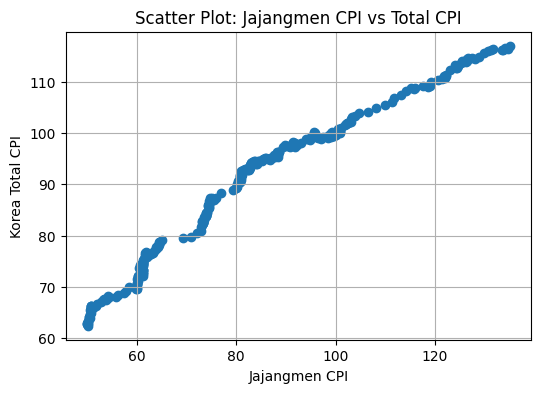

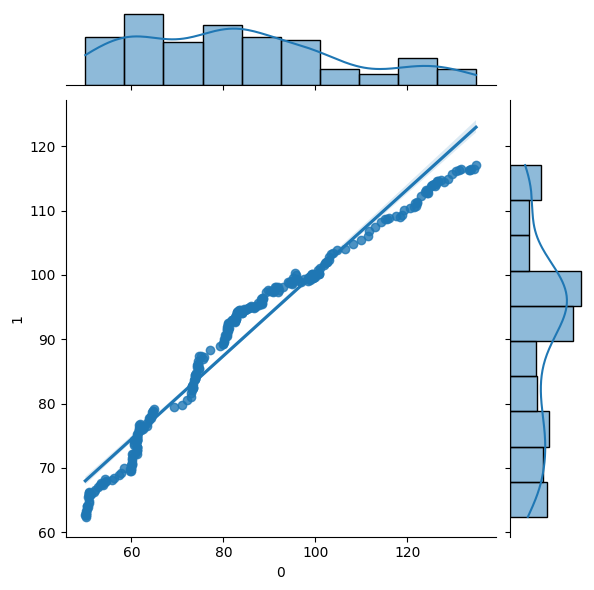

In [ ]:
# ===============================
# 산점도와 선형회귀(자장cpi와 국내 총 cpi)
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.scatter(jajangmen_cpi, korea_cpi)
plt.xlabel("Jajangmen CPI")
plt.ylabel("Korea Total CPI")
plt.title("Scatter Plot: Jajangmen CPI vs Total CPI")
plt.grid()
plt.show()

# Jointplot (상관 구조 확인)
sns.jointplot(x=jajangmen_cpi, y=korea_cpi, kind='reg')
plt.show()

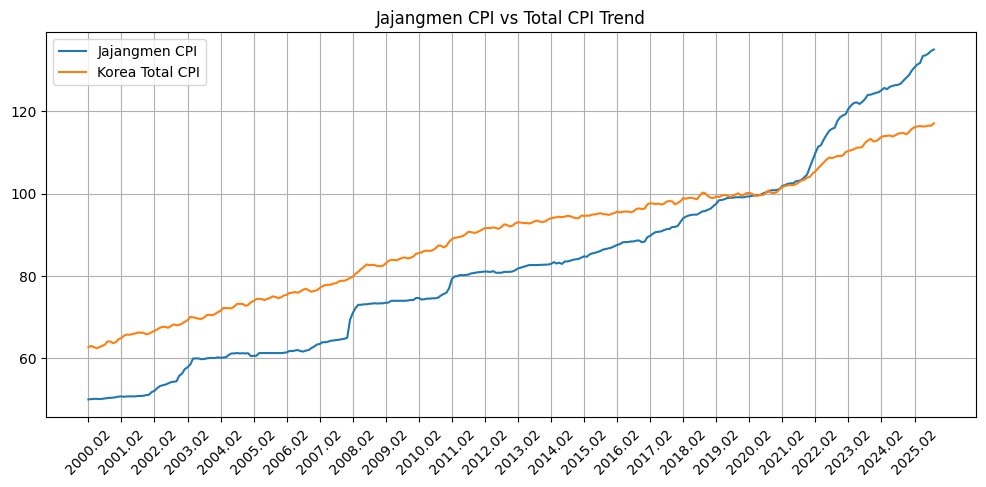

In [ ]:
# ===============================
# 자장cpi와 국내 총 cpi 비교 그래프
# ===============================
# 날짜 정보를 x축으로 사용하기 위해 인덱스를 날짜로 설정
dates = jajangmen_cpi.index

plt.figure(figsize=(12,5))
plt.plot(dates, jajangmen_cpi, label="Jajangmen CPI")
plt.plot(dates, korea_cpi, label="Korea Total CPI")
plt.legend()
plt.title("Jajangmen CPI vs Total CPI Trend")
plt.xticks(dates[::12], rotation=45)
plt.grid()
plt.show()

In [ ]:
# ===============================
# 자장면 CPI vs KOSPI 상관계수 계산
# ===============================

# 0번 row: 자장면 CPI, 2번 row: KOSPI (파일 구조에 따라 수정이 필요하면 iloc index 조정)
jajangmen_cpi = df.iloc[0]   # 자장면 CPI (2행)
kospi = df.iloc[2]           # KOSPI (4행)

correlation_jajang_kospi = jajangmen_cpi.corr(kospi)

print(" 자장면 CPI vs KOSPI 상관계수:", correlation_jajang_kospi)


 자장면 CPI vs KOSPI 상관계수: 0.8850992253399229


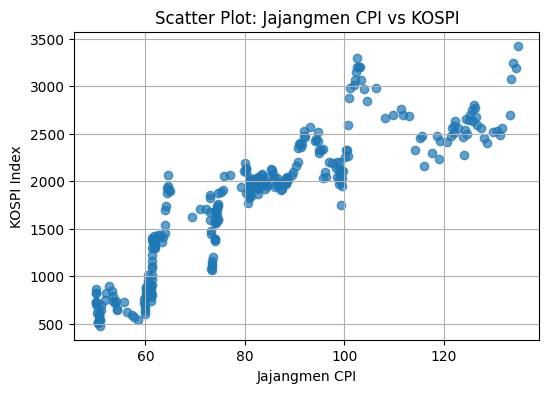

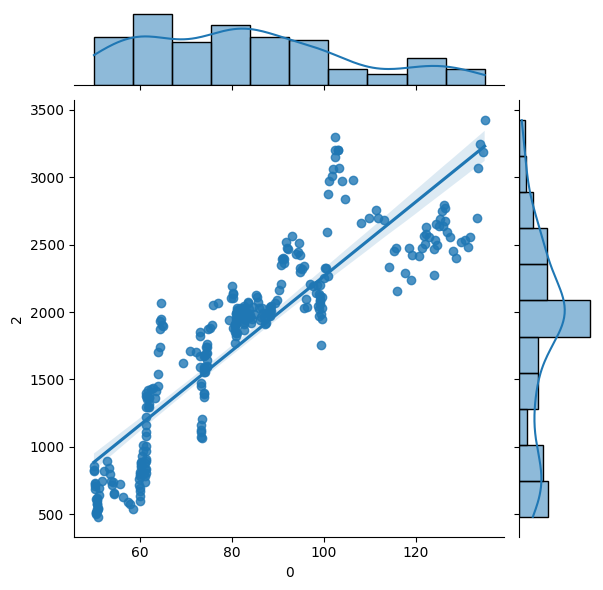

In [ ]:
# ===============================
# 산점도와 회쉬분석(자장cpi와 kospi)
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.scatter(jajangmen_cpi, kospi, alpha=0.7)
plt.xlabel("Jajangmen CPI")
plt.ylabel("KOSPI Index")
plt.title("Scatter Plot: Jajangmen CPI vs KOSPI")
plt.grid()
plt.show()

sns.jointplot(x=jajangmen_cpi, y=kospi, kind='reg')
plt.show()


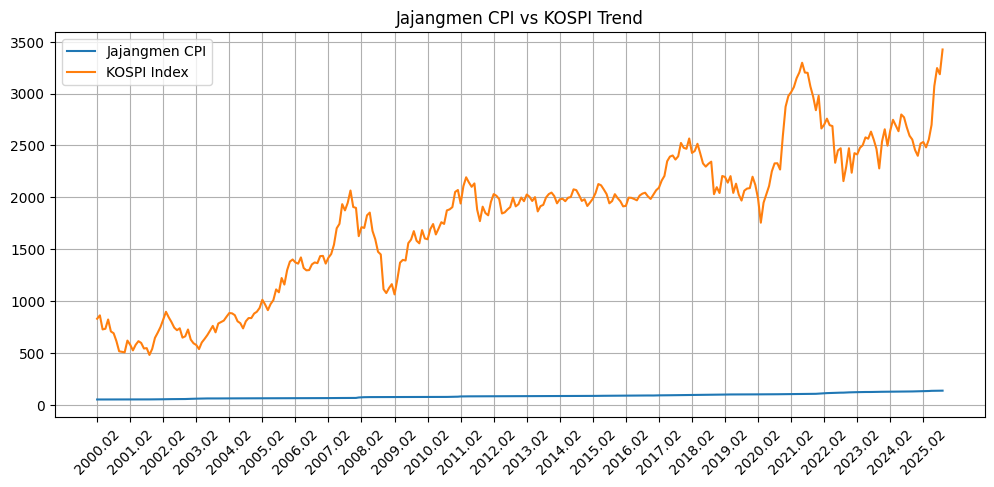

In [ ]:
# ===============================
# 살제 짜장면CPI와 KOSPI 그래프 비교
# ===============================

dates = jajangmen_cpi.index

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(dates, jajangmen_cpi, label="Jajangmen CPI")
plt.plot(dates, kospi, label="KOSPI Index")
plt.legend()
plt.grid()
plt.title("Jajangmen CPI vs KOSPI Trend")

# X축 tick 12개월 간격으로 표시 (1년)
plt.xticks(dates[::12], rotation=45)

plt.show()

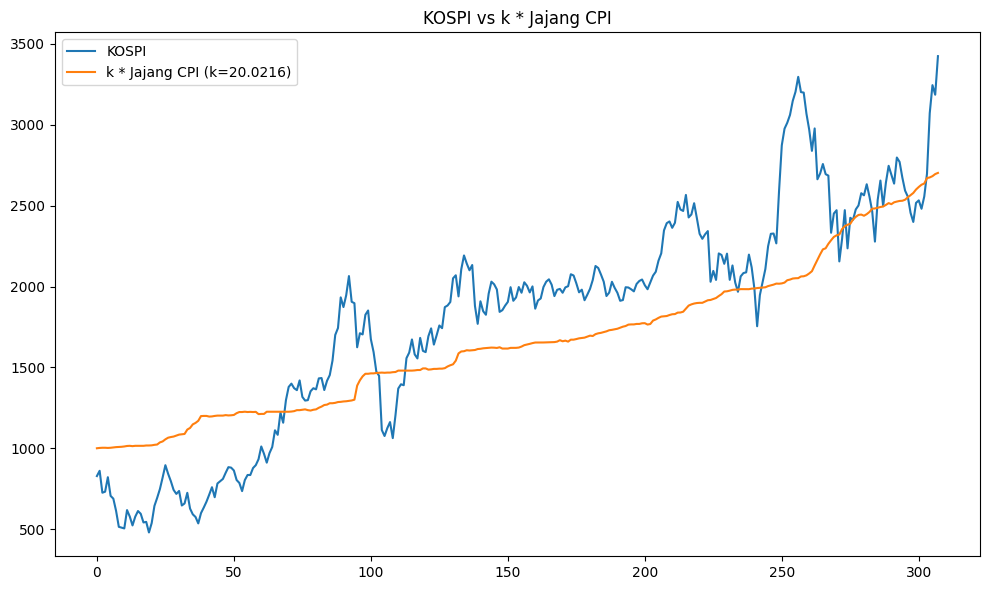

Average scaling factor k: 20.0216


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# rows
jajang = df.iloc[0] # Changed from df.iloc[1] to df.iloc[0] for Jajangmen CPI
cpi = df.iloc[1] # This seems to be Korea Total CPI, kept as is.
kospi = df.iloc[2] # Changed from df.iloc[3] to df.iloc[2] for KOSPI

k_values = (kospi - jajang) / jajang
k_avg = k_values.mean()
jajang_k_scaled = k_avg * jajang

plt.figure(figsize=(10,6))
plt.plot(kospi.values, label="KOSPI")
plt.plot(jajang_k_scaled.values, label=f"k * Jajang CPI (k={k_avg:.4f})")
plt.legend()
plt.title("KOSPI vs k * Jajang CPI")
plt.tight_layout()
plt.show()

print(f"Average scaling factor k: {k_avg:.4f}")

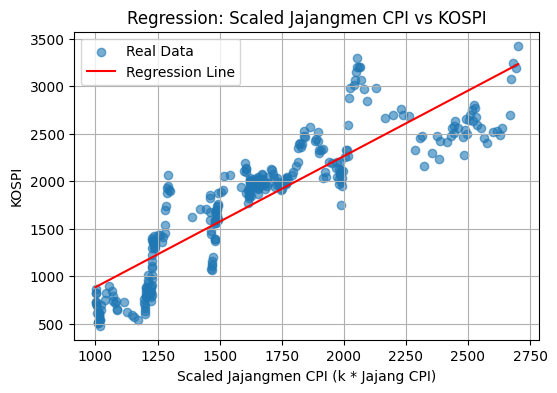

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
# jajangmen_cpi와 kospi는 이미 Series 형태로 존재합니다.
# LinearRegression 모델은 2D 배열을 입력으로 기대하므로, reshape(-1, 1)을 사용합니다.
# X_jajang를 jajang_k_scaled를 사용하여 업데이트
X_jajang_scaled = jajang_k_scaled.values.reshape(-1, 1) # k_avg * jajang
y_kospi = kospi.values  # y_kospi를 kospi 값으로 정의합니다.

# Linear Regression Model Training
model_jajang_scaled = LinearRegression() # 새로운 모델 인스턴스 생성
model_jajang_scaled.fit(X_jajang_scaled, y_kospi)

plt.figure(figsize=(6,4))
plt.scatter(jajang_k_scaled, y_kospi, alpha=0.6, label="Real Data")
plt.plot(jajang_k_scaled, model_jajang_scaled.predict(X_jajang_scaled), color='red', label="Regression Line")
plt.xlabel("Scaled Jajangmen CPI (k * Jajang CPI)") # X축 레이블 변경
plt.ylabel("KOSPI")
plt.title("Regression: Scaled Jajangmen CPI vs KOSPI")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# 데이터 준비
# 기존 df에서 0행(자장면CPI), 1행(국내CPI), 2행(KOSPI)을 선택하고 전치하여
# 각 항목이 컬럼이 되도록 새로운 DataFrame 생성
data_for_model = df.iloc[[0, 1, 2]].T
data_for_model.columns = ['자장면CPI', '국내CPI', 'KOSPI']

data = data_for_model.values # numpy array로 변환

# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

sequence = 3  # 최근 3개월을 보고 예측

X = []
y = []

# data_scaled는 이제 컬럼: 자장면CPI (0), 국내CPI (1), KOSPI (2)
for i in range(sequence, len(data_scaled)):
    X.append(data_scaled[i-sequence:i])   # 3개월치 입력 (자장면CPI, 국내CPI, KOSPI 모두 포함)
    y.append(data_scaled[i][0])           # 자장면 CPI(0번째 column)를 타겟으로 사용

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# 훈련/테스트 분리 (시간 순서 유지: shuffle=False)
split = int(len(X) * 0.6) # 테스트 기간을 늘리기 위해 0.8에서 0.6으로 변경
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X shape: (305, 3, 3)
y shape: (305,)


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(sequence, 3)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))   # 다음달 자장면 CPI 예측

model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=0)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


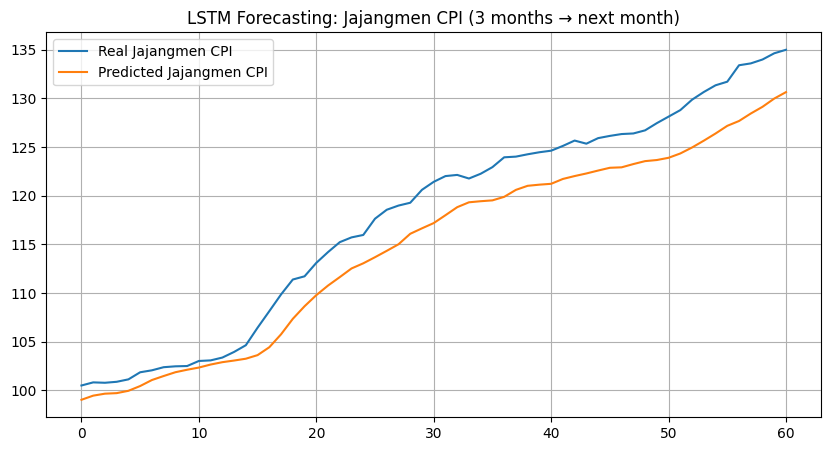

In [ ]:
y_pred_scaled = model.predict(X_test)

# 역정규화
y_pred = scaler.inverse_transform(
    np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled),2))], axis=1)
)[:,0]   # 첫 column만 자장면CPI

y_real = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1,1), np.zeros((len(y_test),2))], axis=1)
)[:,0]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_real, label="Real Jajangmen CPI")
plt.plot(y_pred, label="Predicted Jajangmen CPI")
plt.legend()
plt.title("LSTM Forecasting: Jajangmen CPI (3 months → next month)")
plt.grid()
plt.show()


In [ ]:
# ===============================
# 회귀 모델 계수 (아까 계산한 값 사용)
# ===============================
a_jajang = model_jajang_scaled.intercept_   # 이전 회귀분석에서 나온 intercept
b_jajang = model_jajang_scaled.coef_[0]   # 이전 회귀분석에서 나온 coefficient

# ===============================
# 예측 자장면 CPI 기반 KOSPI 예측
# ===============================
# LSTM으로 예측된 자장면 CPI (y_pred)에 k_avg를 곱한 후, 회귀 모델 계수를 사용하여 KOSPI 예측
predicted_kospi = a_jajang + b_jajang * (y_pred * k_avg)

# real_kospi는 data_for_model의 KOSPI 컬럼에서, y_pred와 같은 시점의 데이터를 가져와야 함
real_kospi = data_for_model['KOSPI'].values[split + sequence:]

# ===============================
# 성능 지표 계산
# ===============================
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse_kospi = np.sqrt(mean_squared_error(real_kospi, predicted_kospi))
mae_kospi = mean_absolute_error(real_kospi, predicted_kospi)

print("예측 자장면 CPI (k*jajang) 기반 KOSPI 예측 성능")
print("RMSE:", rmse_kospi)
print("MAE:", mae_kospi)

예측 자장면 CPI (k*jajang) 기반 KOSPI 예측 성능
RMSE: 440.58374990603085
MAE: 372.8844543764305


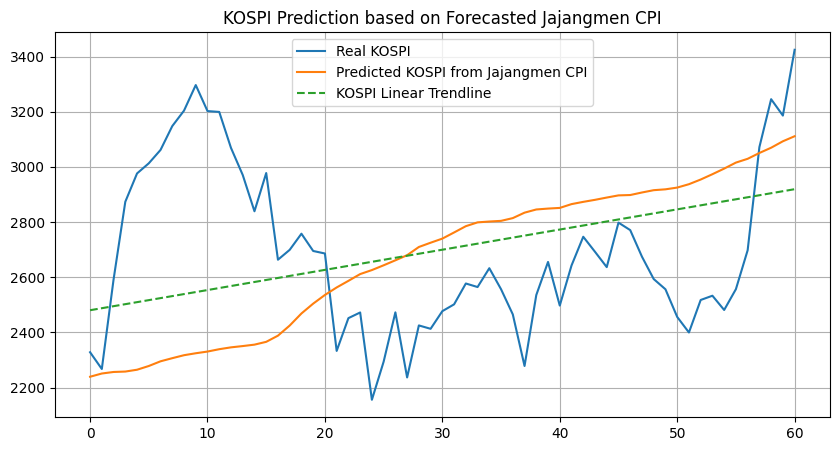

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# KOSPI 데이터와 시간 인덱스 준비
time_index = np.arange(len(data_for_model)).reshape(-1, 1)
kospi_values = data_for_model['KOSPI'].values

# KOSPI vs. 시간 선형 회귀 모델 훈련
model_kospi_time = LinearRegression()
model_kospi_time.fit(time_index, kospi_values)

# 예측값 계산
kospi_trend_line = model_kospi_time.predict(time_index)

# KOSPI 선형 추세선을 테스트 기간에 맞춰 슬라이싱
kospi_trend_line_test_period = kospi_trend_line[split + sequence:]

plt.figure(figsize=(10,5))
plt.plot(real_kospi, label="Real KOSPI")
plt.plot(predicted_kospi, label="Predicted KOSPI from Jajangmen CPI")
plt.plot(kospi_trend_line_test_period, label="KOSPI Linear Trendline", linestyle='--') # 추가
plt.title("KOSPI Prediction based on Forecasted Jajangmen CPI")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# 'data_for_model' DataFrame은 이미 '자장면CPI'와 'KOSPI'를 컬럼으로 가지고 있음.
# 이를 사용하여 log 값과 spread를 계산합니다.
data_for_model["log_kospi"] = np.log(data_for_model["KOSPI"])
data_for_model["log_cpi"] = np.log(data_for_model["자장면CPI"])
data_for_model["spread"] = data_for_model["log_kospi"] - data_for_model["log_cpi"]

# 새로 생성된 컬럼들의 head를 출력하여 확인합니다.
print(data_for_model[["log_kospi", "log_cpi", "spread"]].head())

         log_kospi   log_cpi    spread
2000.02   6.719472  3.911243  2.808229
2000.03   6.758025  3.913262  2.844763
2000.04   6.586709  3.914280  2.672429
2000.05   6.595617  3.914280  2.681336
2000.06   6.710791  3.913262  2.797529


In [ ]:
spread_data = data_for_model["spread"].values.reshape(-1,1)

# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler_spread = MinMaxScaler()
spread_scaled = scaler_spread.fit_transform(spread_data)

sequence = 6   # 최근 6개월 기반 예측

X_s = []
y_s = []

for i in range(sequence, len(spread_scaled)):
    X_s.append(spread_scaled[i-sequence:i])
    y_s.append(spread_scaled[i])

X_s = np.array(X_s)
y_s = np.array(y_s)

# Train/Test split
split = int(len(X_s) * 0.8)
X_s_train, X_s_test = X_s[:split], X_s[split:]
y_s_train, y_s_test = y_s[:split], y_s[split:]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model_spread = Sequential()
model_spread.add(LSTM(64, return_sequences=False, input_shape=(sequence,1)))
model_spread.add(Dropout(0.2))
model_spread.add(Dense(32, activation='relu'))
model_spread.add(Dense(1))

model_spread.compile(optimizer='adam', loss='mse')
model_spread.summary()

history = model_spread.fit(X_s_train, y_s_train, epochs=200, batch_size=16,
                           validation_split=0.1, verbose=0)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
spread_pred_scaled = model_spread.predict(X_s_test)
spread_pred = scaler_spread.inverse_transform(spread_pred_scaled)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [ ]:
# predicted CPI(length equal test zone)
predicted_cpi = y_pred.reshape(-1)

# kospi reconstruction
predicted_kospi_spread = np.exp(np.log(predicted_cpi) + spread_pred.reshape(-1))

# 'df' 대신 'data_for_model'에서 KOSPI 데이터를 가져오고,
# LSTM 모델의 테스트 세트 시작 인덱스에 맞춰 슬라이싱
real_kospi = data_for_model["KOSPI"].values[split + sequence:]

Spread 방식 기반 KOSPI 예측 성능
RMSE: 189.47539992054223
MAE: 155.139764941378


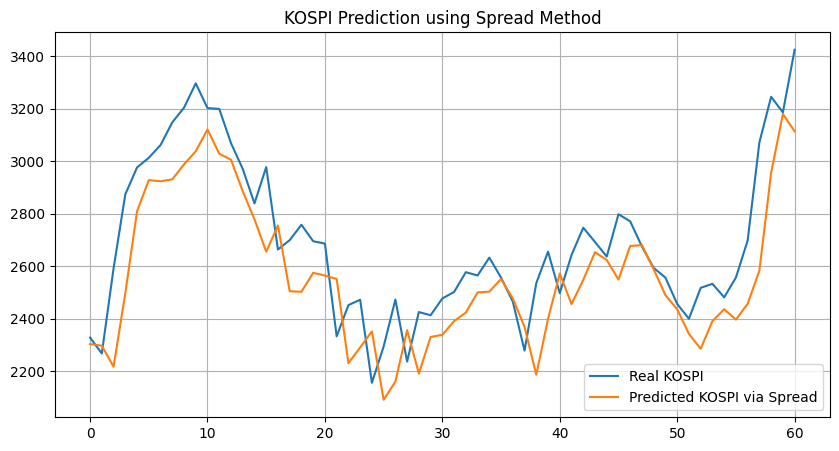

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_spread = np.sqrt(mean_squared_error(real_kospi, predicted_kospi_spread))
mae_spread = mean_absolute_error(real_kospi, predicted_kospi_spread)

print("Spread 방식 기반 KOSPI 예측 성능")
print("RMSE:", rmse_spread)
print("MAE:", mae_spread)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(real_kospi, label="Real KOSPI")
plt.plot(predicted_kospi_spread, label="Predicted KOSPI via Spread")
plt.legend()
plt.title("KOSPI Prediction using Spread Method")
plt.grid()
plt.show()
